In [50]:
import pandas as pd

# Define file paths
file_path = "/Users/jarvis/Downloads/Monthly Prescription Drug Plan Formulary and Pharmacy Network Information/2025-01/2025_20250123/basic drugs formulary file  20250131.txt"  # Example file

# Load file with '|' as the delimiter
df = pd.read_csv(file_path, delimiter="|")

# Save as CSV for Power BI and further analysis
df.to_csv("/Users/jarvis/pymycod/US_Formulary_monthly/basic_drug_formulary.csv", index=False)

# Display sample
print(df.head())

   FORMULARY_ID  FORMULARY_VERSION  CONTRACT_YEAR    RXCUI      NDC  \
0         25000                 13           2025  1551300  2143380   
1         25000                 13           2025  1551306  2143480   
2         25000                 13           2025  2058877  2143611   
3         25000                 13           2025  2601758  2145780   
4         25000                 13           2025  2601776  2146080   

   TIER_LEVEL_VALUE QUANTITY_LIMIT_YN QUANTITY_LIMIT_AMOUNT  \
0                 3                 Y                     2   
1                 3                 Y                     2   
2                 3                 Y                     2   
3                 3                 Y                     2   
4                 3                 Y                     2   

  QUANTITY_LIMIT_DAYS PRIOR_AUTHORIZATION_YN STEP_THERAPY_YN  
0                  28                      Y               N  
1                  28                      Y               N  
2    

In [51]:
import pandas as pd

# Load the formulary data
df = pd.read_csv("basic_drug_formulary.csv")

# Display basic info
print(df.info())
print(df.describe())

# Display first 5 rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299073 entries, 0 to 1299072
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   FORMULARY_ID            1299073 non-null  int64 
 1   FORMULARY_VERSION       1299073 non-null  int64 
 2   CONTRACT_YEAR           1299073 non-null  int64 
 3   RXCUI                   1299073 non-null  int64 
 4   NDC                     1299073 non-null  int64 
 5   TIER_LEVEL_VALUE        1299073 non-null  int64 
 6   QUANTITY_LIMIT_YN       1299073 non-null  object
 7   QUANTITY_LIMIT_AMOUNT   1299073 non-null  object
 8   QUANTITY_LIMIT_DAYS     1299073 non-null  object
 9   PRIOR_AUTHORIZATION_YN  1299073 non-null  object
 10  STEP_THERAPY_YN         1299073 non-null  object
dtypes: int64(6), object(5)
memory usage: 109.0+ MB
None
       FORMULARY_ID  FORMULARY_VERSION  CONTRACT_YEAR         RXCUI  \
count  1.299073e+06       1.299073e+06      1299073.0  1.

,FORMULARY_ID,FORMULARY_VERSION,CONTRACT_YEAR,RXCUI,NDC,TIER_LEVEL_VALUE,QUANTITY_LIMIT_YN,QUANTITY_LIMIT_AMOUNT,QUANTITY_LIMIT_DAYS,PRIOR_AUTHORIZATION_YN,STEP_THERAPY_YN
0,25000,13,2025,1551300,2143380,3,Y,2,28,Y,N
1,25000,13,2025,1551306,2143480,3,Y,2,28,Y,N
2,25000,13,2025,2058877,2143611,3,Y,2,28,Y,N
3,25000,13,2025,2601758,2145780,3,Y,2,28,Y,N
4,25000,13,2025,2601776,2146080,3,Y,2,28,Y,N


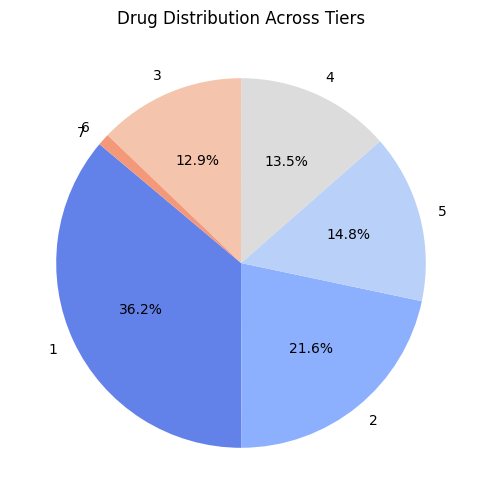

In [52]:
########## DRUG TIER Distribution ########## Per tier drug count ##########


import seaborn as sns
import matplotlib.pyplot as plt

# Count drugs per tier
tier_counts = df["TIER_LEVEL_VALUE"].value_counts()

# Define a function to show percentages only if they are >= 5%
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 5 else ''

# Create the pie chart
plt.figure(figsize=(8,6))
colors = sns.color_palette("coolwarm", len(tier_counts))

plt.pie(tier_counts, labels=tier_counts.index, autopct=autopct_format, colors=colors, startangle=140)

plt.title("Drug Distribution Across Tiers")
plt.show()




#	•	Are most drugs generic or specialty?
#   •	Which tier has the highest coverage?

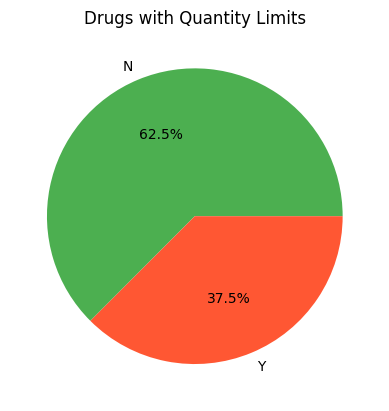

In [53]:
############Quantity Limits Analysis##############
ql_counts = df["QUANTITY_LIMIT_YN"].value_counts()
ql_counts.plot(kind="pie", autopct="%1.1f%%", colors=["#4CAF50", "#FF5733"], title="Drugs with Quantity Limits")
plt.ylabel("")
plt.show()



#  To see how many drugs have quantity restrictions.
# What % of drugs have quantity limits?
# Are restrictions common across all drugs?

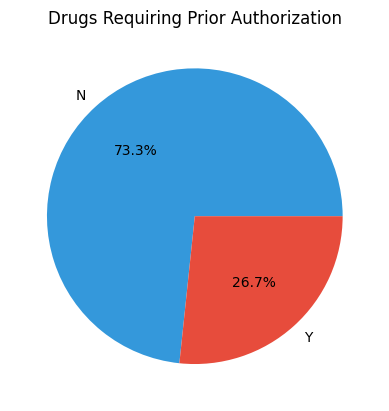

In [54]:
####### Prior Authorization Requirements Analysis ########


pa_counts = df["PRIOR_AUTHORIZATION_YN"].value_counts()
pa_counts.plot(kind="pie", autopct="%1.1f%%", colors=["#3498DB", "#E74C3C"], title="Drugs Requiring Prior Authorization")
plt.ylabel("")
plt.show()



# Identify how many drugs need special approval before use.
# 	•	What % of drugs require extra approval?
#       Could this impact patient access?

In [55]:
print(df["PRIOR_AUTHORIZATION_YN"].unique())

['Y' 'N']


In [56]:
df["PRIOR_AUTHORIZATION_YN"] = df["PRIOR_AUTHORIZATION_YN"].astype(str).str.strip().str.upper()
df["PRIOR_AUTHORIZATION_YN"] = df["PRIOR_AUTHORIZATION_YN"].map({"Y": 1, "N": 0}).fillna(0)

In [57]:
print(df["PRIOR_AUTHORIZATION_YN"].unique())

[1 0]


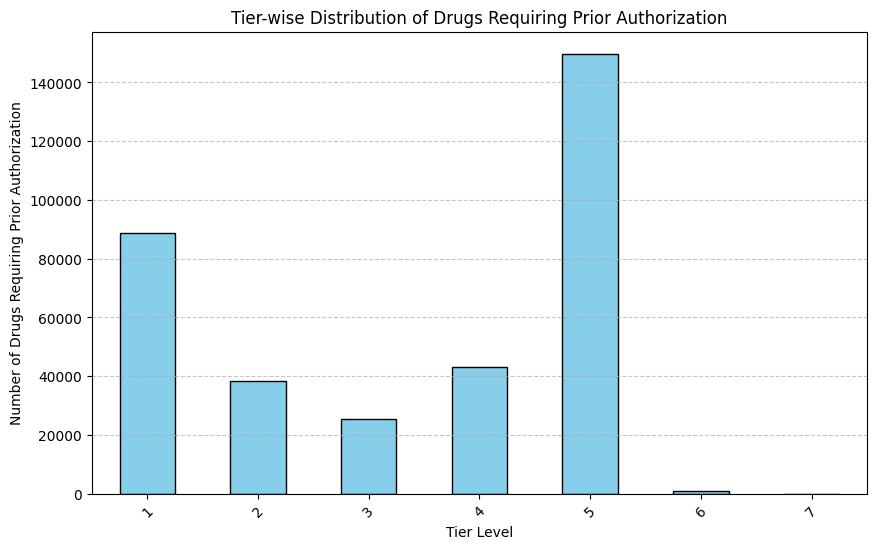

In [58]:
import matplotlib.pyplot as plt

# Group by TIER_LEVEL_VALUE and count drugs requiring prior authorization
tier_distribution = df.groupby("TIER_LEVEL_VALUE")["PRIOR_AUTHORIZATION_YN"].sum()

# Plot the distribution
plt.figure(figsize=(10, 6))
tier_distribution.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Tier Level")
plt.ylabel("Number of Drugs Requiring Prior Authorization")
plt.title("Tier-wise Distribution of Drugs Requiring Prior Authorization")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

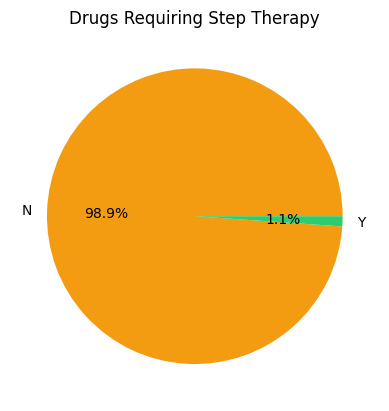

In [59]:
###### Step Therapy Requirements #######
st_counts = df["STEP_THERAPY_YN"].value_counts()
st_counts.plot(kind="pie", autopct="%1.1f%%", colors=["#F39C12", "#2ECC71"], title="Drugs Requiring Step Therapy")
plt.ylabel("")
plt.show()



#  Step therapy forces patients to try cheaper drugs first before expensive ones.
#  How common is step therapy?
## Does it impact access to necessary medications?

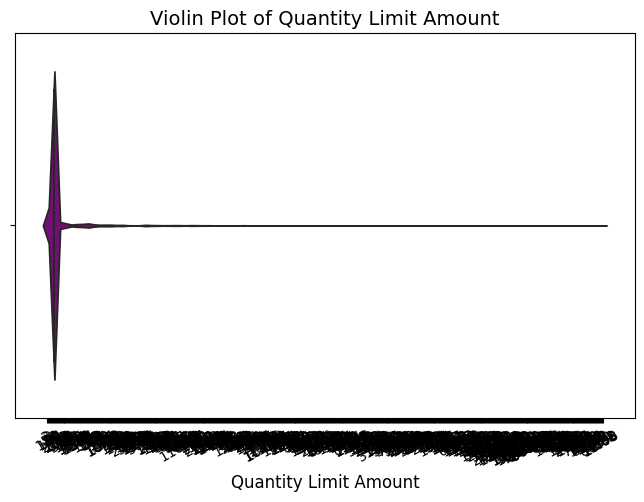

In [60]:
##### Common Quantity Limits #####

plt.figure(figsize=(8,5))
sns.violinplot(x=df["QUANTITY_LIMIT_AMOUNT"].dropna(), color="purple", inner="quartile")

plt.title("Violin Plot of Quantity Limit Amount", fontsize=14)
plt.xlabel("Quantity Limit Amount", fontsize=12)

# Rotate x-labels if needed
plt.xticks(rotation=30)

plt.show()

# Understand how strict the drug limits are.
# Most common quantity limits applied.
# How restrictive are the plans?
